In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.neighbors import NearestNeighbors

(1797, 64)


<Figure size 432x288 with 0 Axes>

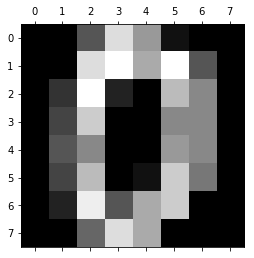

In [4]:
#Introduction
digits = datasets.load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.target[0]

0

In [7]:
iris = datasets.load_iris()

In [8]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [9]:
iris.target[10]

0

In [10]:
iris.data[10]

array([5.4, 3.7, 1.5, 0.2])

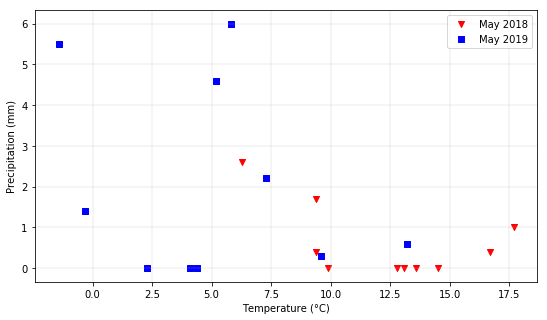

In [11]:
#Exercise 1

#Question 1
X_data= np.array([[9.4, 9.9, 13.1, 14.5, 13.6, 12.8, 16.7, 17.7, 9.4, 6.3, 2.3, 5.2, 4.1, -1.4, -0.3, 4.4, 5.8, 7.3, 9.6, 13.2],[0.4,0,0,0,0,0,0.4,1,1.7,2.6,0,4.6,0,5.5,1.4,0,6,2.2,0.3,0.6]])
X_target=np.array([0,0, 0, 0, 0, 0, 0, 0, 0,0,1,1,1,1,1,1,1,1,1,1])
X_data=np.transpose(X_data) #20 lines 2 columns
X_target=np.transpose(X_target)

#Question 2
temp_2018=X_data[0:10:1,0]
temp_2019=X_data[10:20:1,0]
precip_2018=X_data[0:10:1,1]
precip_2019=X_data[10:20:1,1]

plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
plt.scatter(temp_2018,precip_2018,color='red',marker='v', label='May 2018')
plt.scatter(temp_2019,precip_2019,color='blue',marker='s', label='May 2019')
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("")
plt.legend(loc='upper right')
plt.show()

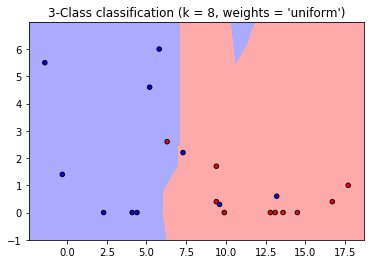

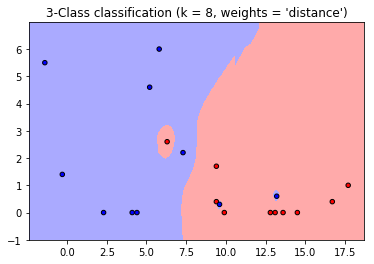

In [12]:
#Question 3
n_neighbors =8
h = .02  # step size in the mesh

temp=X_data[0:20:1,0]
precip=X_data[0:20:1,1]

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_data, X_target)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = temp.min() - 1, temp.max() + 1
    y_min, y_max = precip.min() - 1, precip.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(temp, precip, c=X_target, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.savefig('Domain distance');
plt.show()

In [13]:
clf.kneighbors([[6.5,1]])

(array([[1.44222051, 1.61245155, 2.32594067, 2.6       , 2.96141858,
         2.98328678, 3.17804972, 3.54400903]]),
 array([[17,  9, 15, 12,  0,  8, 18,  1]]))

In [14]:
clf.predict([[6.5,1]])

array([1])

In [15]:
X_data_test=np.array([[9.9, 12.8, 15.4, 18.4, 19.9, 19, 9.3, 10.1, 9.9, 14.3, 12.2, 16.5, 12.4, 14.3, 12.8, 7, 5.1, 4.4, 6.7, 4.1],[0.2,0,0,0,0,0, 10.8, 1.8, 0, 0,0 ,0, 0.1, 0.4, 0.4, 1.6, 10, 2.8, 0, 0]])
X_target_test=np.array([0,0, 0, 0, 0, 0, 0, 0, 0,0,1,1,1,1,1,1,1,1,1,1])
X_data_test=np.transpose(X_data_test) #20 lines 2 columns
X_target_test=np.transpose(X_target_test)
clf.score(X_data_test,X_target_test)

0.7

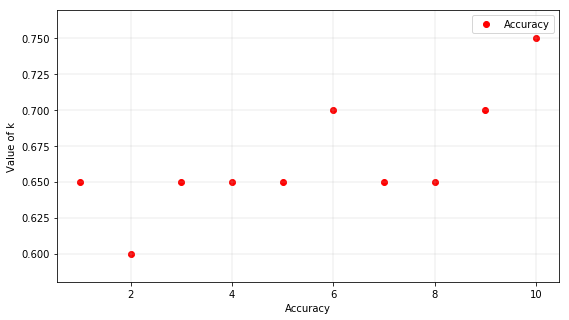

In [18]:
#Question 6
n_neighbors =1
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
Current_k=np.zeros(10)
Score=np.zeros(10)
for n_neighbors in range(1, 11):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X_data, X_target)
    Current_k[n_neighbors-1]=n_neighbors
    Score[n_neighbors-1]=clf.score(X_data_test,X_target_test)
    
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(Current_k,Score,color='red', label='Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.title("")
plt.legend(loc='upper right')
plt.show()

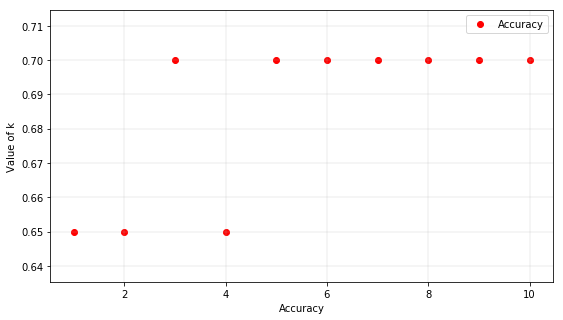

In [19]:
#Question 6_bis
n_neighbors =1
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
Current_k=np.zeros(10)
Score=np.zeros(10)
for n_neighbors in range(1, 11):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_data, X_target)
    Current_k[n_neighbors-1]=n_neighbors
    Score[n_neighbors-1]=clf.score(X_data_test,X_target_test)
    
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(Current_k,Score,color='red', label='Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.title("")
plt.legend(loc='upper right')
plt.show()

In [27]:
#Exercise 2
digits = datasets.load_digits()
#We only consider the 500 first data points for the training set.
X_data=digits.data[0:500,:]
X_target=digits.target[0:500]

#We consider the next 500 points for the testing set
X_data_testing=digits.data[500:1001,:]
X_target_testing=digits.target[500:1001]


#We consider the next 500 points for the unknown set
X_data_unknown=digits.data[1000:1797,:]
X_target_unknown=digits.target[1000:1797]
#Nb of neighbours
n_neighbors = 50

#Training
import time
start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='kd_tree', weights='distance')
clf.fit(X_data, X_target)
clf.score(X_data_testing,X_target_testing)
end = time.time()
print(clf.score(X_data_testing,X_target_testing))
print(clf.score(X_data_unknown,X_target_unknown))
print(end - start)

0.810379241516966
0.8858218318695107
0.030745506286621094


In [28]:
#Brute Force
import time
start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute', weights='distance')
clf.fit(X_data, X_target)
clf.score(X_data_testing,X_target_testing)
end = time.time()
print(clf.score(X_data_testing,X_target_testing))
print(end - start)

#Training ball tree
import time
start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='ball_tree', weights='distance')
clf.fit(X_data, X_target)
clf.score(X_data_testing,X_target_testing)
end = time.time()
print(clf.score(X_data_testing,X_target_testing))
print(end - start)



0.810379241516966
0.011968374252319336
0.8083832335329342
0.02892160415649414


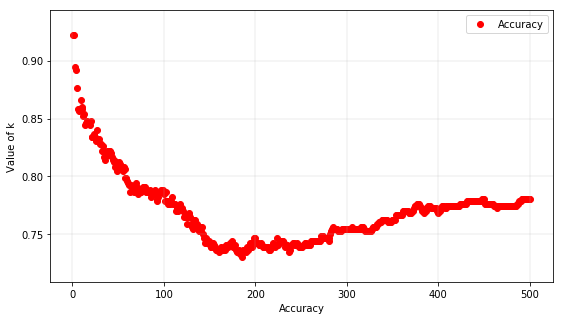

In [29]:
#Training
Current_k=np.zeros(500)
Score=np.zeros(500)

for n_neighbors in range(1, 501):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_data, X_target)
    Current_k[n_neighbors-1]=n_neighbors
    Score[n_neighbors-1]=clf.score(X_data_testing,X_target_testing)
    
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(Current_k,Score,color='red', label='Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.title("")
plt.legend(loc='upper right')
plt.show()

In [30]:
#EXERCISE 3
#Question 1
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X_data = iris.data[:, :2]
X_target = iris.target

#Training set
X_data_training=X_data[0:150:3,:]
X_target_training=X_target[0:150:3]

#We consider the next 50 points for the testing set
X_data_testing=X_data[1:150:3,:]
X_target_testing=X_target[1:150:3]


#We consider the next 50 points for the unknown set
X_data_unknown=X_data[2:150:3,:]
X_target_unknown=X_target[2:150:3]
h = .02  # step size in the mesh


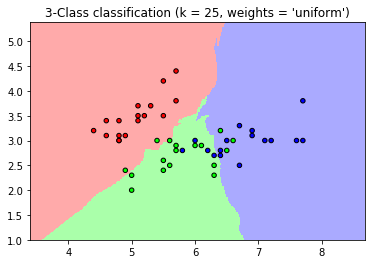

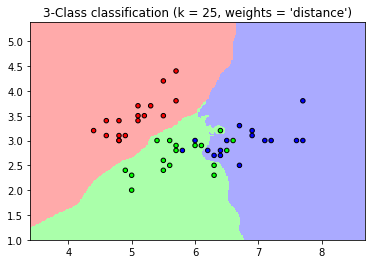

0.76

In [31]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors=25

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_data_training, X_target_training)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_data_training[:, 0].min() - 1, X_data_training[:, 0].max() + 1
    y_min, y_max = X_data_training[:, 1].min() - 1, X_data_training[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_data_training[:, 0], X_data_training[:, 1], c=X_target_training, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
clf.score(X_data_unknown,X_target_unknown)

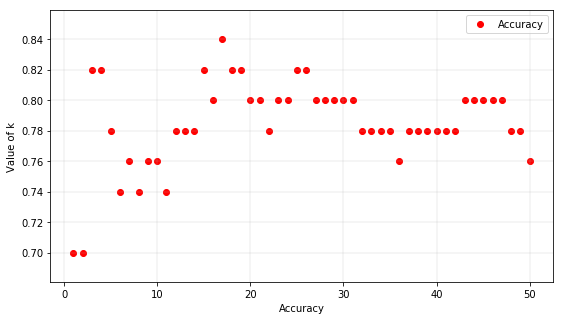

In [32]:
#Question 3
Current_k=np.zeros(50)
Score=np.zeros(50)

for n_neighbors in range(1, 51):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_data_training, X_target_training)
    Current_k[n_neighbors-1]=n_neighbors
    Score[n_neighbors-1]=clf.score(X_data_testing,X_target_testing)
    
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(Current_k,Score,color='red', label='Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.title("")
plt.legend(loc='upper right')
plt.show()


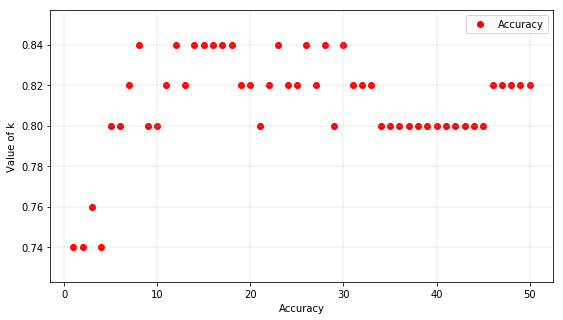

In [33]:
#Question 4
Current_k=np.zeros(50)
Score=np.zeros(50)

for n_neighbors in range(1, 51):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_data_testing, X_target_testing)
    Current_k[n_neighbors-1]=n_neighbors
    Score[n_neighbors-1]=clf.score(X_data_training,X_target_training)
    
plt.figure(figsize=(9,5))
plt.grid(linewidth=0.25)
plt.scatter(Current_k,Score,color='red', label='Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Value of k")
plt.title("")
plt.legend(loc='upper right')
plt.show()

Automatically created module for IPython interactive environment


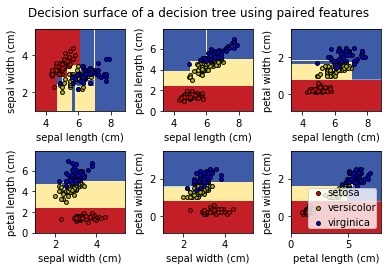

<Figure size 432x288 with 0 Axes>

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn import plot_tree
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure() 
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
#tree.plot_tree(clf)
plt.show()

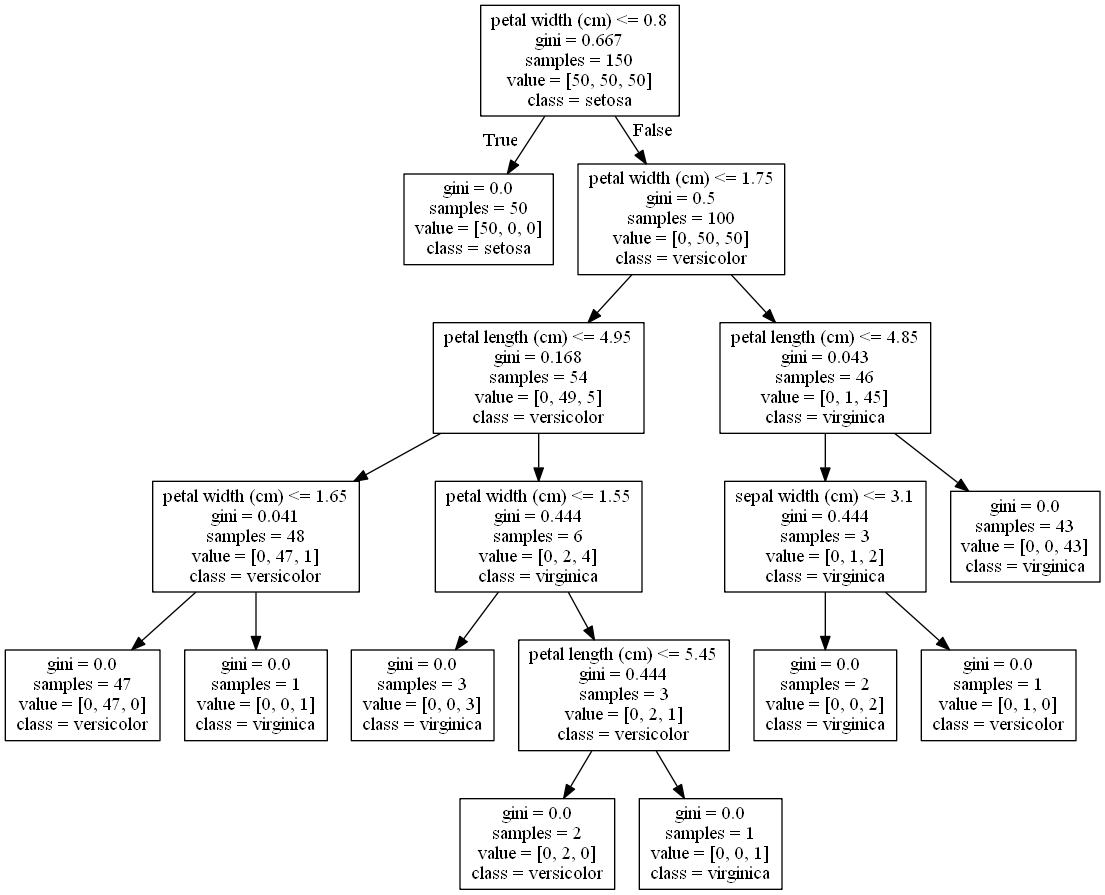

In [67]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
# Load data
iris = datasets.load_iris()
X_data = iris.data
X_target = iris.target
# Create decision tree classifier object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X_data, X_target)
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

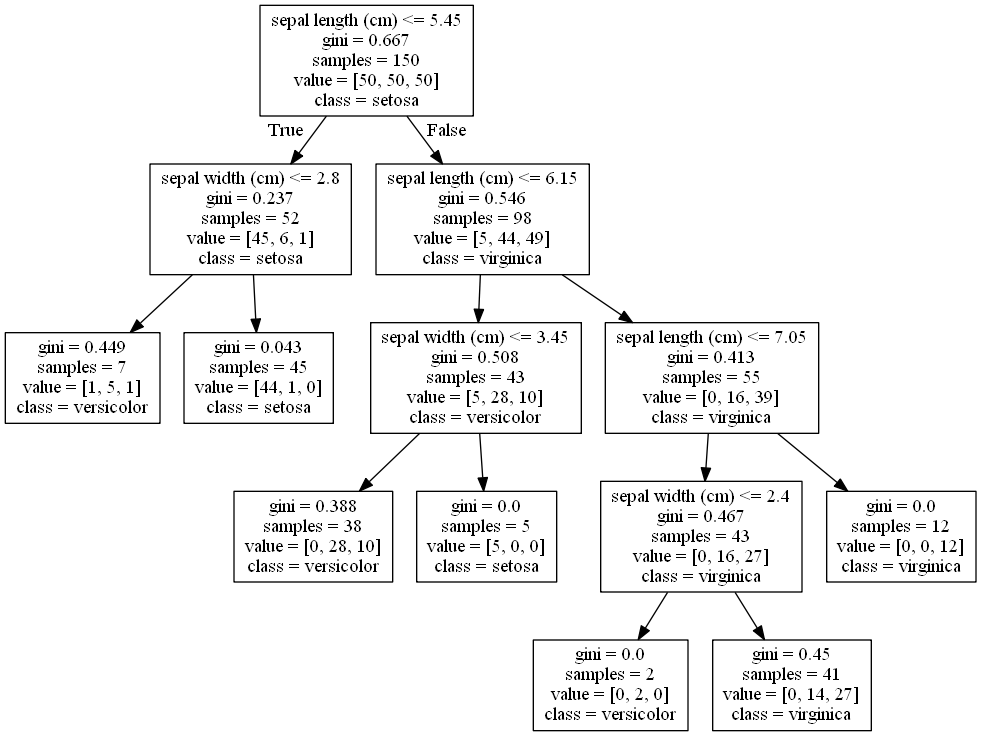

In [109]:
#EXERCISE 4
#Question 1
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X_data = iris.data[:, :2]
X_target = iris.target

#Training set
X_data_training=X_data[0:150:2,:]
X_target_training=X_target[0:150:2]

#We consider the next 75 points for the testing set
X_data_unknown=X_data[1:150:2,:]
X_target_unknown=X_target[1:150:2]


Param_selec=iris.feature_names[:2]

# Create decision tree classifier object
clf = DecisionTreeClassifier(splitter='best', max_depth=5, min_impurity_decrease =0.01)

# Train model
model = clf.fit(X_data, X_target)
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=Param_selec,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [110]:
clf.score(X_data_unknown,X_target_unknown)

0.84